#Preliminary operations

In [6]:
# import main libraries
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

In [7]:
# mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# import data
df_data = pd.read_excel("drive/MyDrive/Progetto Data Mining 2/CODICE PROGETTO/Data Understanding and Preparation/DATASET PREPARED/df_prep_TRAIN.xlsx", index_col="Unnamed: 0")
X = df_data.values

In [9]:
df_data.head()

,sum,std,q25,q50,kur,skew,lag1_sum,lag1_kur,lag1_skew,zc_sum,...,mfcc_q95_w4,mfcc_q99_w4,mfcc_kur_w4,sc_std_w4,sc_kur_w4,sc_skew_w4,stft_sum_w4,stft_mean_w4,stft_q95_w4,stft_kur_w4
0,0.604904,-1.113727,1.155846,-0.064505,0.746422,1.597947,0.032809,0.526054,0.663058,-1.434221,...,-0.583254,-1.515480,-0.248903,-0.405919,3.146246,-1.505367,0.202942,1.325865,0.035922,3.971428
1,0.565092,-1.067513,1.155846,-0.064505,0.941449,1.648120,0.032809,0.186319,0.920248,-1.261744,...,-0.816861,-0.814428,0.141589,-0.408215,-0.236257,-0.713717,-0.120760,0.953175,0.035922,-0.381447
2,0.610689,-0.946842,1.891250,-0.064505,1.011526,1.770978,-0.885806,0.614675,0.111653,-1.673729,...,-0.514856,-1.120598,-0.095555,-0.227969,2.741296,-1.301205,-0.232259,1.008646,0.035922,2.877028
3,0.598277,-0.975367,1.155846,-0.064505,1.569306,1.970460,-0.696296,0.565900,0.856282,-1.352954,...,-0.059808,-0.706300,-0.404156,-0.535901,-0.469754,-0.612675,-0.537815,0.888896,0.035922,-0.307128
4,0.595865,-1.306279,1.155846,-0.064505,0.488840,1.426924,-0.696296,0.269613,0.151788,-1.499722,...,-0.503638,-0.784317,0.042496,-0.230801,0.600646,-0.701060,0.212217,0.950638,0.035922,1.797345


# Deviation Based

In [10]:
# transpose data
df_data_T = df_data.T
X_t = df_data_T.values
# create a score matrix like df_data
# df_scores = df_data.copy()

In [11]:
# def sf function (professor code)
def sf(x, X):
    idx = list(X).index(x)
    X1 = np.array([x1 for i, x1 in enumerate(X) if i != idx])
    return np.abs(np.var(X) - np.var(X1))

In [12]:
# define a score matrix
deviations = np.empty((106, 1828))
# initialize features counter
c = 0
# iterate features
for col in X_t:
  print(c, col)
  # iterate elements in the feature
  for i, x in enumerate(col):
    # calculate deviation
    deviations[c][i] = sf(x, col)
  c += 1

0 [ 0.60490442  0.56509247  0.61068909 ... -0.5071484  -0.35423069
 -0.49216026]
1 [-1.11372749 -1.06751267 -0.94684195 ... -0.40285259 -0.20840717
 -0.42806831]
2 [1.15584576 1.15584576 1.8912496  ... 1.8912496  1.15584576 1.15584576]
3 [-0.06450482 -0.06450482 -0.06450482 ... -0.06450482 -0.06450482
 -0.06450482]
4 [ 0.74642236  0.94144863  1.01152627 ... -0.92405503 -1.31581313
 -1.29965268]
5 [ 1.59794668  1.64811987  1.77097784 ... -0.29177808 -0.55506269
 -0.89918169]
6 [ 0.03280875  0.03280875 -0.88580558 ...  0.03280875  0.03280875
  0.03280875]
7 [ 0.52605389  0.18631913  0.6146753  ...  0.69847631 -0.06791362
  0.32902542]
8 [ 0.66305756  0.92024798  0.11165317 ... -0.14648382 -1.06425039
 -2.69896285]
9 [-1.43422091 -1.26174425 -1.67372917 ... -1.65232209  0.01289593
 -0.45727352]
10 [ 0.43867202  0.43867202 -2.27960746 ... -2.27960746  0.43867202
  0.43867202]
11 [ 0.37318196  0.38173456  0.4545886  ...  0.00797602 -0.33041387
  0.03776517]
12 [-0.77284398 -0.69634743 -0.71

In [24]:
# transpose deviations
deviations_t = np.transpose(deviations)
# transform deviations matrix in a DataFrame
df_deviations = pd.DataFrame(deviations_t, columns=df_data.columns)

In [26]:
# extract top 1% outliers
deviations_sum = np.sum(df_deviations, axis=1)
assert len(deviations_sum) == 1828, "wrong axis"

In [36]:
out_index = deviations_sum.sort_values(ascending=False)[:18]
out_index

942     1.067818
382     0.899193
589     0.727813
1704    0.372294
1367    0.362232
314     0.359784
315     0.353169
324     0.351610
1597    0.348398
840     0.314075
1702    0.305821
311     0.292222
308     0.289770
1703    0.279115
656     0.246327
309     0.242726
1720    0.228668
1707    0.226030
dtype: float64

In [28]:
df_deviations["score"] = np.sum(df_deviations, axis=1)
df_deviations["outlier"] = 0
df_deviations.loc[out_index, "outlier"] = 1

In [29]:
df_deviations.to_excel("df_deviations.xlsx")

#Dimensionality reduction

##PCA

In [37]:
from sklearn.decomposition import PCA

In [38]:
pca = PCA(n_components=2)
pca.fit(X)
X_train_pca = pca.transform(X)

In [39]:
X_train_pca.shape

(1828, 2)

In [40]:
import matplotlib.pyplot as plt

In [41]:
X_train_pca

array([[-7.1475207 , -1.54921216],
       [-5.72913325,  0.9270673 ],
       [-7.25103662,  0.6249532 ],
       ...,
       [-4.63655494, -4.89029165],
       [-0.74315243, -5.02724167],
       [-2.41778838, -5.27670166]])

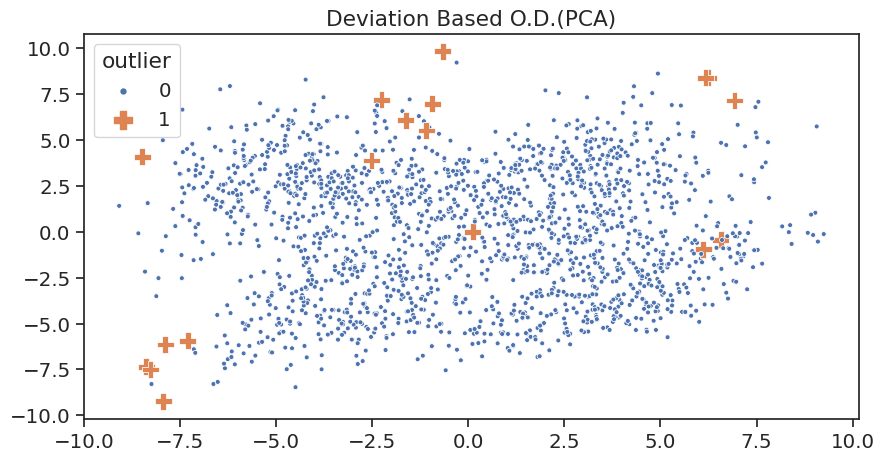

In [57]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.3)

sns.scatterplot(
    data=X_train_pca,
    x = X_train_pca[:, 0],
    y = X_train_pca[:, 1],
    size=df_deviations["outlier"], 
    hue=df_deviations["outlier"],
    sizes=(150, 50), 
    legend="full",
    style=df_deviations["outlier"],
    markers={0:".", 1:"P"}
).set(title="Deviation Based O.D.(PCA)")

plt.savefig("deviation_PCA.svg")

## t-SNE

In [43]:
from sklearn.manifold import TSNE

In [44]:
tsne = TSNE(n_components=2)
X_train_tsne = tsne.fit_transform(X)
X_train_tsne.shape

(1828, 2)

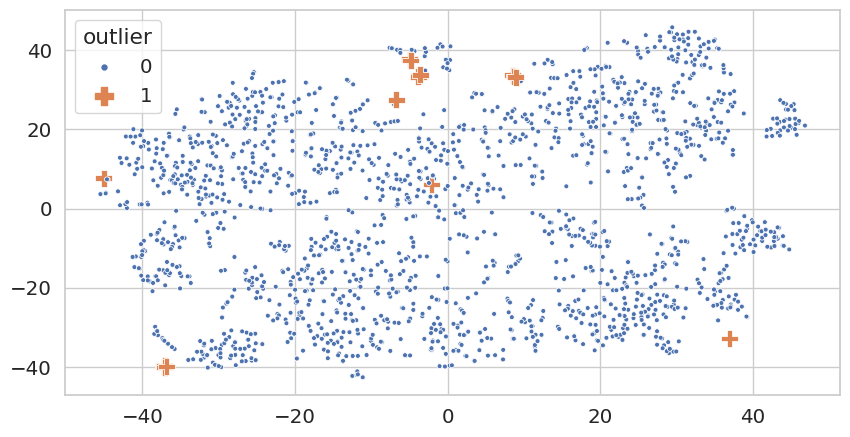

In [45]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.3)

sns.scatterplot(
    data=X_train_tsne,
    x = X_train_tsne[:, 0],
    y = X_train_tsne[:, 1],
    size=df_deviations["outlier"], 
    hue=df_deviations["outlier"],
    sizes=(150, 50), 
    legend="full",
    style=df_deviations["outlier"],
    markers={0:".", 1:"P"}
)

plt.savefig("deviation_tSNE.svg")

## Random Subspace Projection

In [46]:
from sklearn import random_projection

In [47]:
rsp = random_projection.GaussianRandomProjection(n_components=2, random_state=0)
X_train_rsp = rsp.fit_transform(X)
X_train_rsp.shape

(1828, 2)

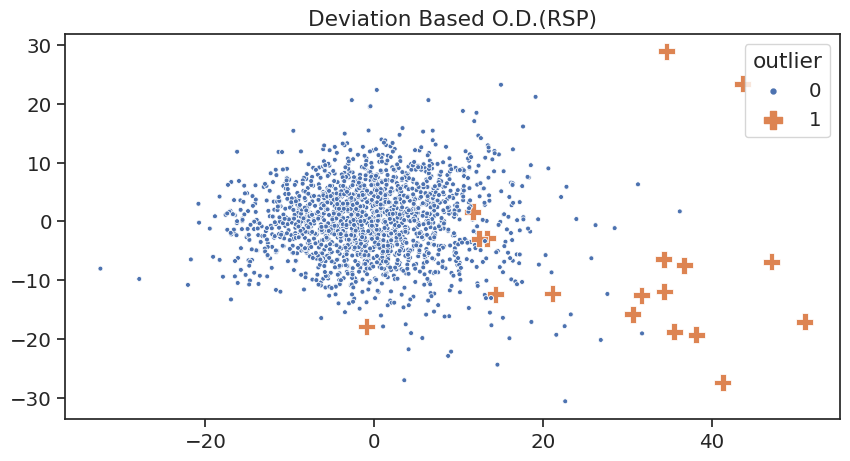

In [56]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.3)

sns.scatterplot(
    data=X_train_rsp,
    x = X_train_rsp[:, 0],
    y = X_train_rsp[:, 1],
    size=df_deviations["outlier"], 
    hue=df_deviations["outlier"],
    sizes=(150, 50), 
    legend="full",
    style=df_deviations["outlier"],
    markers={0:".", 1:"P"}
).set(title="Deviation Based O.D.(RSP)")

plt.savefig("deviation_RSP.svg")

## IsoMap

In [49]:
from sklearn.manifold import Isomap

In [50]:
iso = Isomap(n_components=2)
X_train_iso = iso.fit_transform(X)
X_train_iso.shape

(1828, 2)

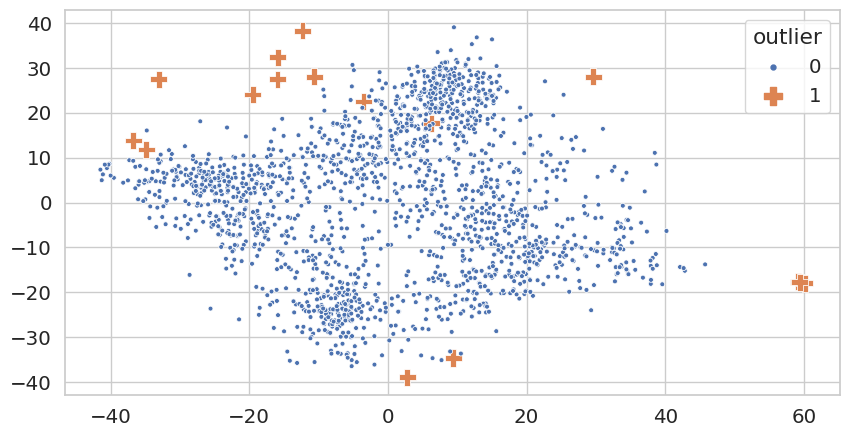

In [51]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.3)

sns.scatterplot(
    data=X_train_iso,
    x = X_train_iso[:, 0],
    y = X_train_iso[:, 1],
    size=df_deviations["outlier"], 
    hue=df_deviations["outlier"],
    sizes=(150, 50), 
    legend="full",
    style=df_deviations["outlier"],
    markers={0:".", 1:"P"}
)

plt.savefig("deviation_IsoMap.svg")